In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
# from keras.utils import to_categorical
from keras.optimizers import Adam
# from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
# from keras import callbacks
import tensorflow as tf
import numpy as np

Dataset is available in Kaggle 

link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2

In [96]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.shape

(145460, 23)

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot: >

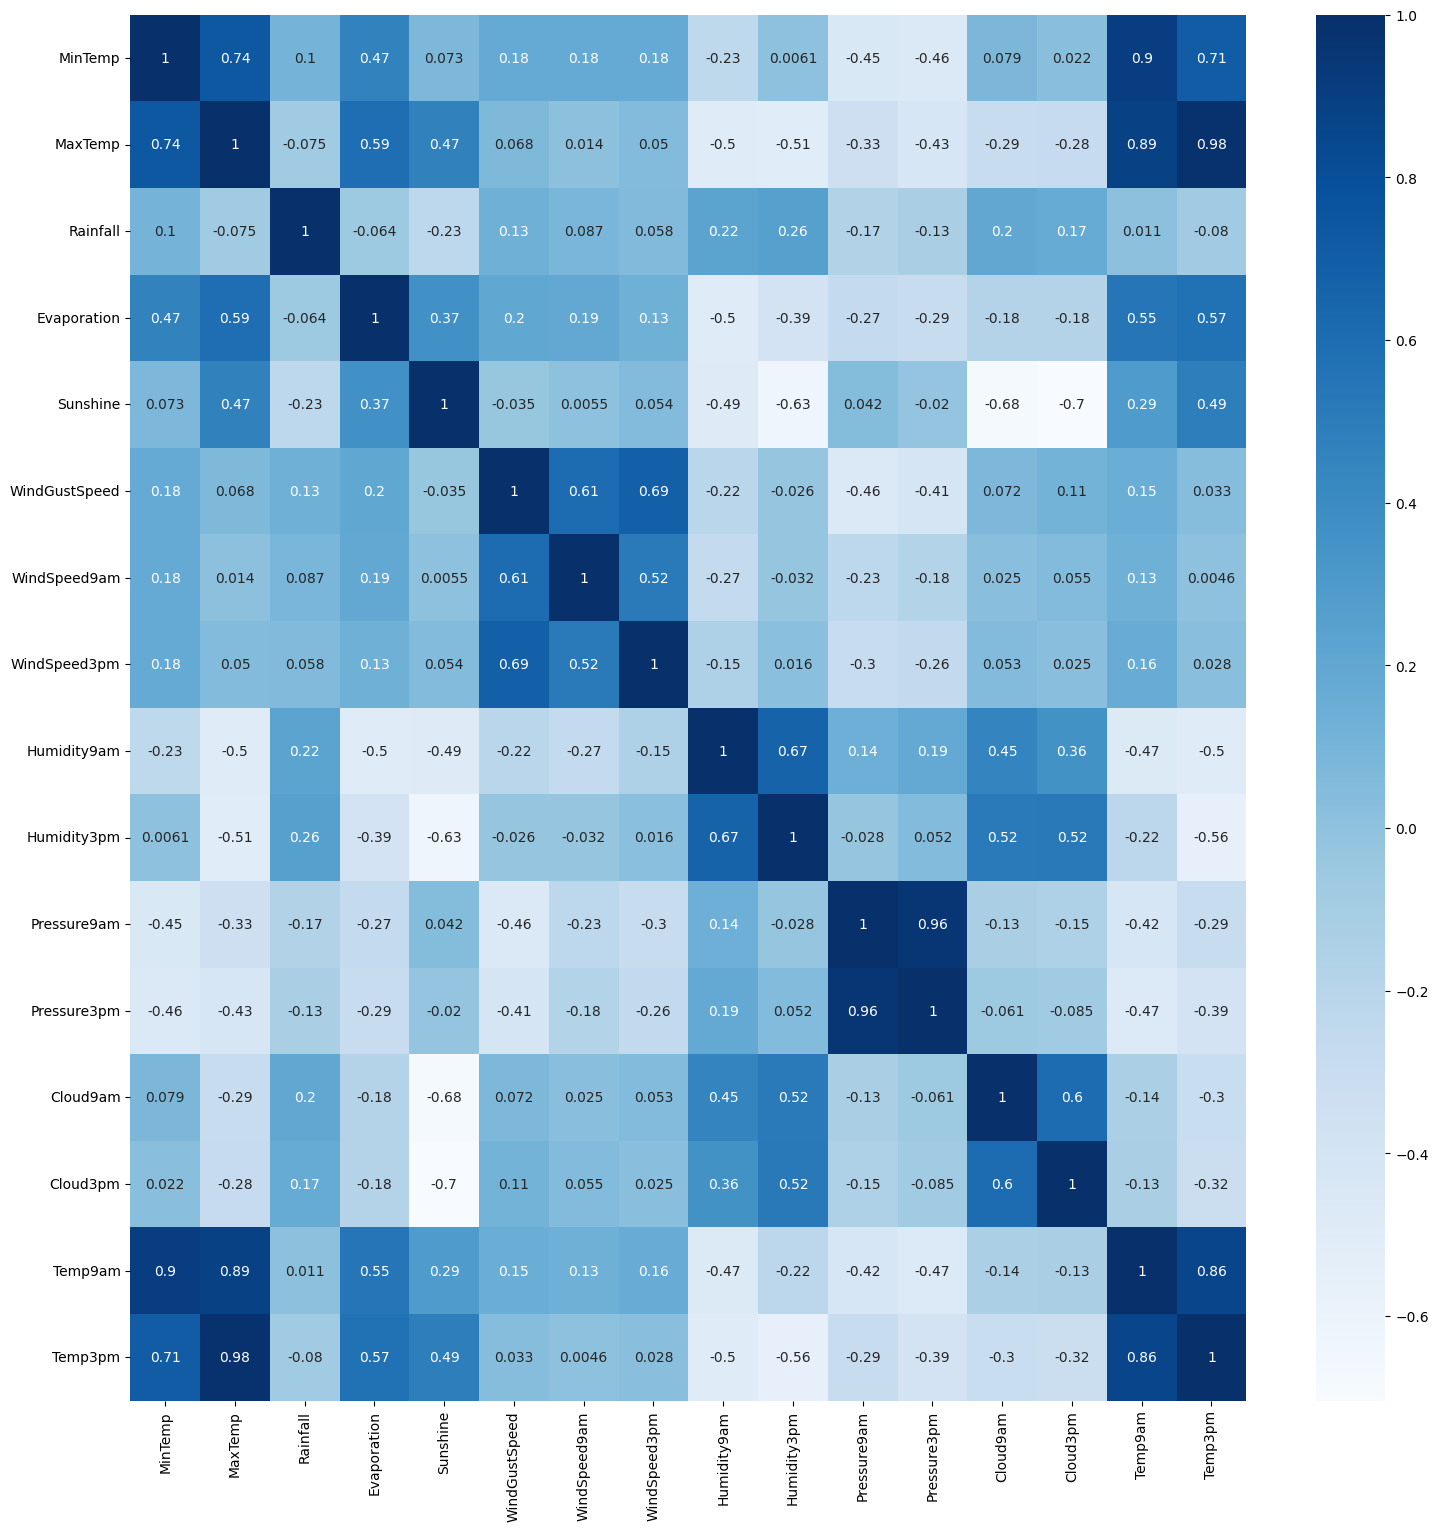

In [6]:
plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

In [7]:
s = (data.dtypes == "object")
s

Date              True
Location          True
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool

In [8]:
data['Date']= pd.to_datetime(data["Date"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [11]:
s = (data.dtypes == 'object')
objectcols = list(s[s].index)
print("Categorical variables:")
print(objectcols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
for i in objectcols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [14]:
for i in objectcols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [24]:
n = (data.dtypes == "float64")
numcols = list(n[n].index)
print("Neumeric variables:")
for i in numcols:
    print(numcols)

Neumeric variables:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [25]:
for i in numcols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [28]:
for i in numcols:
    data[i].fillna(data[i].median(), inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [31]:
label_encoder = LabelEncoder()
for i in objectcols:
    data[i] = label_encoder.fit_transform(data[i])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [33]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [68]:
X = data.iloc[:,1:-1]

In [69]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [70]:
y = data.iloc[:,-1]

In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [72]:
colnames = list(X.columns)
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=colnames)

In [73]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.611499,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,-0.529795
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.382054,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,-0.529795
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,0.840944,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495,-0.529795
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,-1.109339,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202,-0.529795
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,0.152609,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312,-0.529795


In [74]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
X.shape

(145460, 21)

In [122]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.90):
      self.model.stop_training = True

callbacks = myCallback()

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 21))
model.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu'))
# model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'he_uniform', activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50, callbacks=[callbacks], validation_split=0.2)

Epoch 1/50
2910/2910 [==============================] - 15s 5ms/step - loss: 0.4034 - accuracy: 0.8185 - val_loss: 0.3754 - val_accuracy: 0.8363
Epoch 2/50
2910/2910 [==============================] - 14s 5ms/step - loss: 0.3644 - accuracy: 0.8412 - val_loss: 0.3645 - val_accuracy: 0.8411
Epoch 3/50
2910/2910 [==============================] - 15s 5ms/step - loss: 0.3552 - accuracy: 0.8456 - val_loss: 0.3618 - val_accuracy: 0.8439
Epoch 4/50
2910/2910 [==============================] - 14s 5ms/step - loss: 0.3499 - accuracy: 0.8485 - val_loss: 0.3571 - val_accuracy: 0.8448
Epoch 5/50
2910/2910 [==============================] - 14s 5ms/step - loss: 0.3459 - accuracy: 0.8510 - val_loss: 0.3580 - val_accuracy: 0.8441
Epoch 6/50
2910/2910 [==============================] - 16s 5ms/step - loss: 0.3426 - accuracy: 0.8521 - val_loss: 0.3548 - val_accuracy: 0.8463
Epoch 7/50
2910/2910 [==============================] - 15s 5ms/step - loss: 0.3399 - accuracy: 0.8529 - val_loss: 0.3539 - val_ac

In [123]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                1408      
                                                                 
 dense_79 (Dense)            (None, 64)                4160      
                                                                 
 dense_80 (Dense)            (None, 64)                4160      
                                                                 
 dense_81 (Dense)            (None, 32)                2080      
                                                                 
 dense_82 (Dense)            (None, 32)                1056      
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 16)              

In [128]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.7)

910/910 [==============================] - 2s 3ms/step


In [125]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

<AxesSubplot: >

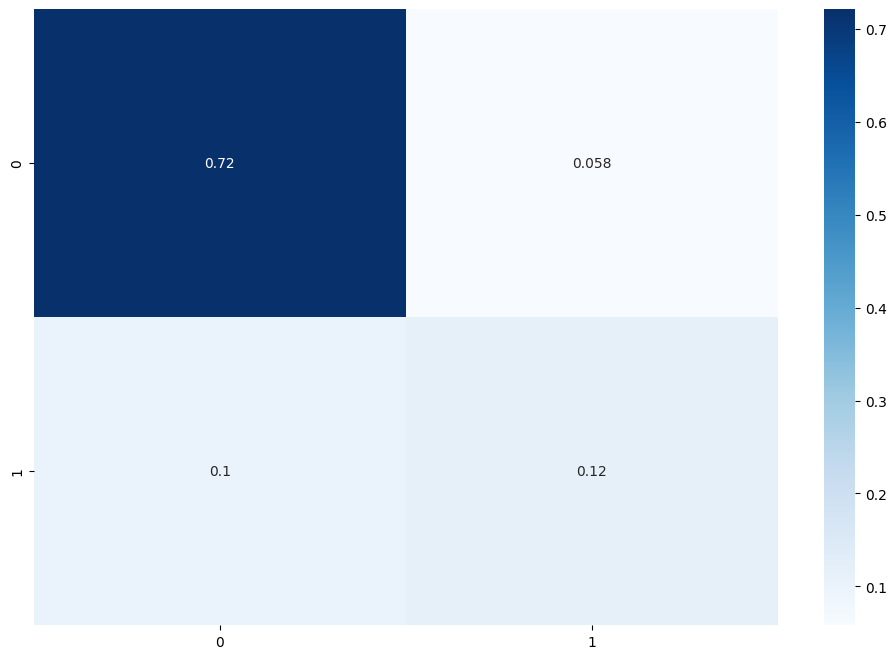

In [127]:
plt.subplots(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), cmap = 'Blues', annot = True)